# Basic plot capabilities

Import libraries to import data and plot it

In [1]:
import script.pyPLUTO as pp
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import pandas as pd

# some commonly used constants
CONST_mp = 1.67262171e-24  # gr

Increase rsolution of plots

In [2]:
mpl.rcParams["figure.dpi"] = 150

Usefull functions

In [3]:
def get_extent(file, firstline):
    """this functions retrieves the extent of the grid (in code-units) and number of points from the grid.out 
    file in one dimension (starting at firstline)
    
    file: the grid.out file
    firstline: the line in the file to look for the number of points in that dimension"""
    with open(file, "r") as gridfile:
        lines = gridfile.readlines()
        # get the number of points
        NUM_POINTS = int(lines[firstline])

        # get the extent of the x-axis (in code units)
        # the first line of the grid, so minimum coordinate
        line = lines[firstline+1]
        parts = line.split()
        # remove the spaces
        for part in parts:
            if part == " ":
                del part
        d_min = float(parts[1])
        # the last line
        line = lines[firstline+NUM_POINTS]
        parts = line.split()
        # remove the spaces
        for part in parts:
            if part == " ":
                del part
        d_max = float(parts[2])
    
    return (NUM_POINTS, (d_min, d_max))

## plot the data

### get metadata of the simulation data

In [8]:
# specify the directories where the data is stored and where the output should be stored
DATA_DIR = "MHD_blastwave/out-raw/beta03/"
OUT_DIR = "test-images/"

# define the conversion factors, can be seen when starting the simulation
UNIT_DENSITY = 1e9*CONST_mp
UNIT_LENGTH = 1e8 # cm (1AU)
UNIT_VELOCITY = 1e8 # cm/s
UNIT_TIME = UNIT_LENGTH/UNIT_VELOCITY
UNIT_PRESSURE = 1.673e1   # dyne/cm^2

In [11]:
# get info about the stored data
file_data = pd.read_csv(DATA_DIR+"dbl.out", sep=" ", names=["index", "t", "dt", "step", "type", "little", "rho",
                                                            "vx1", "vx2", "vx3", "Bx1", "Bx2", "Bx3", "prs", "psi_glm", "empty"])
# delete columns that are not needed
for column in ["index", "type", "little", "rho", "vx1", "vx2", "vx3", "Bx1", "Bx2", "Bx3", "prs", "psi_glm", "empty"]:
    del file_data[column]

X_POINTS = 0
Y_POINTS = 0
X_EXTENT = (0,0)
Y_EXTENT = (0,0)

# get the extend of the grid
# get the extent of the x-axis (in code units)
X_POINTS, X_EXTENT = get_extent(DATA_DIR+"grid.out", 9)
# get the extent of the y-axis
Y_POINTS, Y_EXTENT = get_extent(DATA_DIR+"grid.out", 10+X_POINTS)

# number of files saved
N = len(file_data["t"])

# physical extent of the grid
extent_temp = X_EXTENT + Y_EXTENT
extent = [value*UNIT_LENGTH for value in extent_temp]
# physical time data
T = file_data["t"].values*UNIT_TIME

Reading Data file : MHD_blastwave/out-raw/beta03/data.0005.dbl


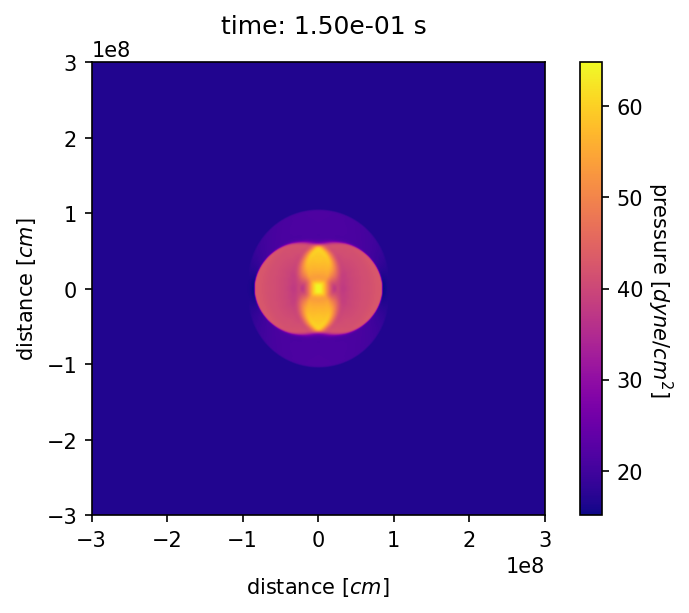

In [15]:
fig, ax = plt.subplots(1,1)

# the frame to plot
n = 5

# get the data
data = pp.pload(n, w_dir=DATA_DIR)   # first number is the number of file you want to plot
prs = data.prs

# plot the data
im = ax.imshow(prs*UNIT_PRESSURE, extent=extent, cmap="plasma")
# plot the colorbar
cbar = fig.colorbar(im, ax=ax)

# lay-out stuff: axis labels and units
cbar.ax.set_ylabel('pressure [$dyne/cm^2$]', rotation=270, labelpad=15.0)
ax.set_xlabel(r"distance $[cm]$", labelpad=12.0)
ax.set_ylabel(r"distance $[cm]$")
# title with timestamp
fig.suptitle("time: %.2e s" %T[n], y=0.96)

# show the plot
plt.show()

# uncomment to save the plot
##fig.savefig(OUT_DIR + "test.png")